In [1]:
import shap
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('Dataset/diabetes.csv')
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [2]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [3]:
exp=shap.Explainer(model)
shap_values=exp(X_test)

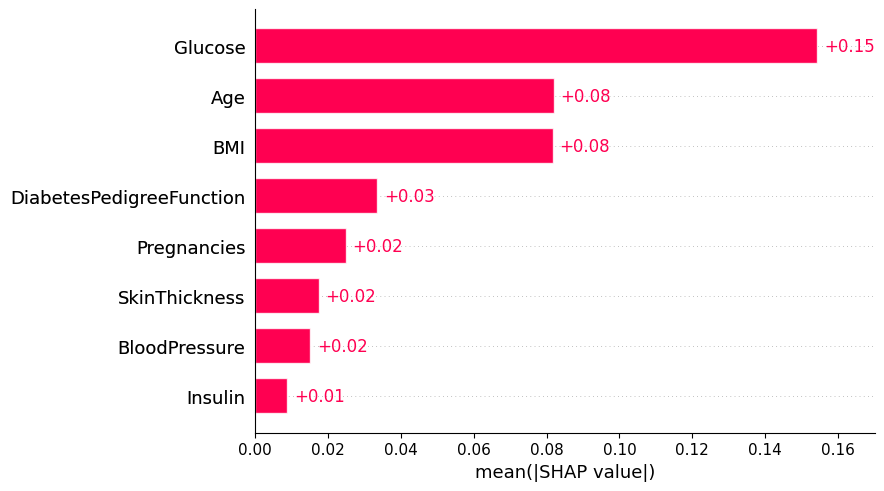

In [4]:
import matplotlib.pyplot as plt
shap.plots.bar(shap_values,max_display=12)

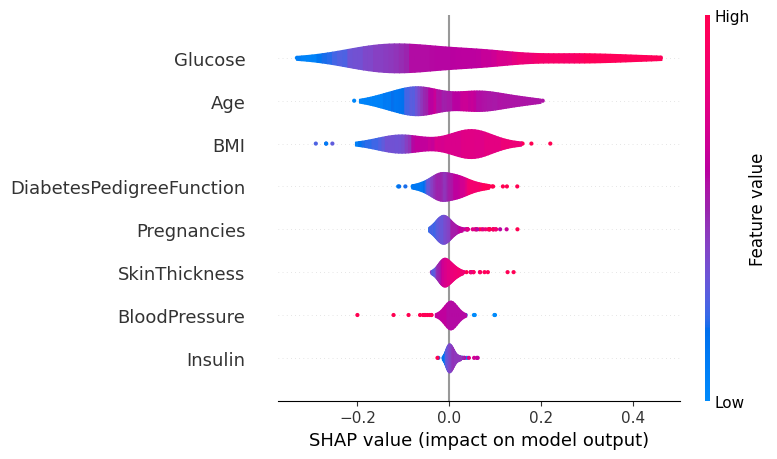

In [5]:
shap.summary_plot(shap_values,plot_type='violin')

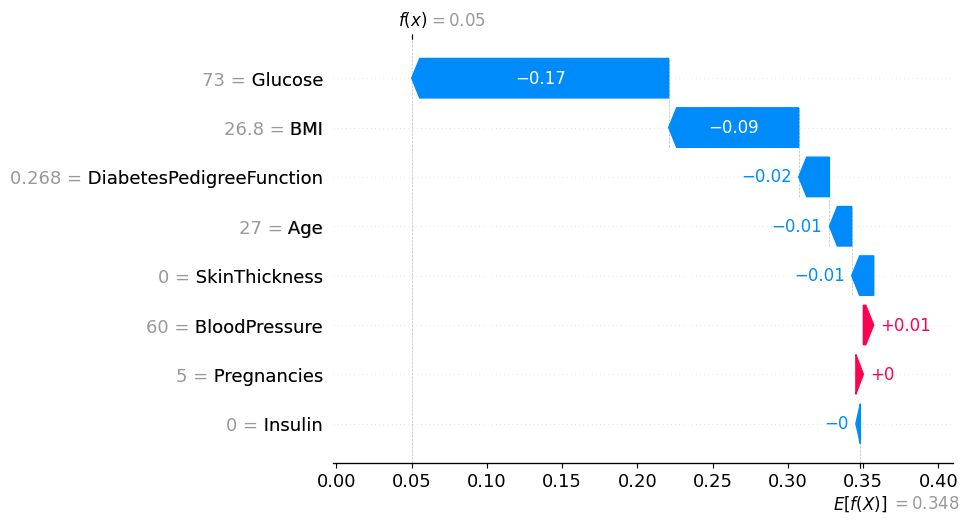

In [6]:
shap.plots.waterfall(shap_values[3])

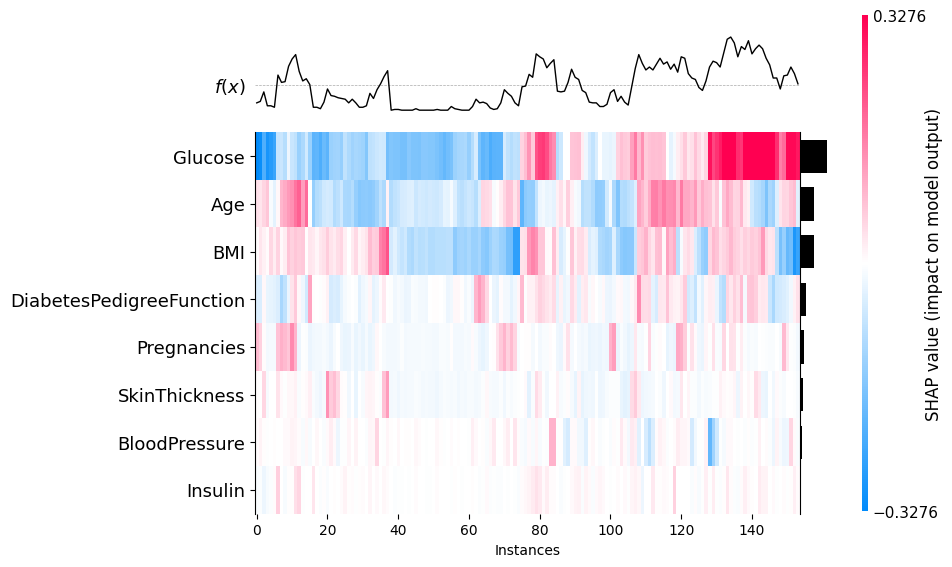

<Axes: xlabel='Instances'>

In [7]:
shap.plots.heatmap(shap_values)

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/5 [00:00<?, ?it/s]

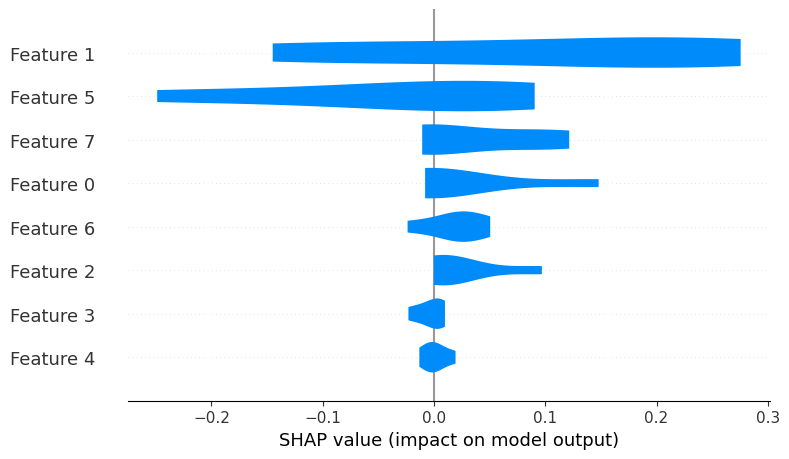

In [8]:
kexp=shap.KernelExplainer(model.predict,X_train)
shap_values=kexp.shap_values(X_test[:5])
shap.summary_plot(shap_values,plot_type='violin')

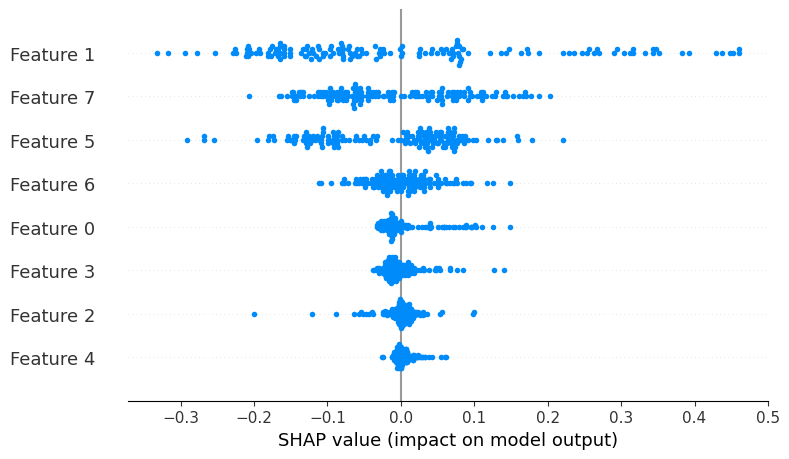

In [15]:
lexp=shap.TreeExplainer(model,X_train)
shap_val=exp.shap_values(X_test)
shap.summary_plot(shap_val)

SHAP DL MODELS

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
dataset_path='cats_dogs'
train_datagen=ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_data=train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    class_mode='binary',
    subset='training'
)
valid_data=train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    subset='validation',
    class_mode='binary'
)


Found 107 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [22]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_data,validation_data=valid_data,epochs=5)

E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 809ms/step - accuracy: 0.5956 - loss: 1.9971 - val_accuracy: 0.5385 - val_loss: 1.3438
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 719ms/step - accuracy: 0.5596 - loss: 0.8091 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 615ms/step - accuracy: 0.6078 - loss: 0.6912 - val_accuracy: 0.5385 - val_loss: 0.6951
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 617ms/step - accuracy: 0.5269 - loss: 0.6852 - val_accuracy: 0.4615 - val_loss: 0.7025
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 589ms/step - accuracy: 0.5568 - loss: 0.6809 - val_accuracy: 0.5385 - val_loss: 0.6958


In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
# Choose a test image from validation set
test_img_path = 'cats_dogs/cats/cat.1.jpg'  # Or a 'dog' image
img = load_img(test_img_path, target_size=(150,150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_preprocessed = img_array / 255.0

E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(1, 150, 150, 3))']
  warnings.warn(msg)
E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 150, 150, 3))']
  warnings.warn(msg)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0003945454955101013..0.00036073848605155945].


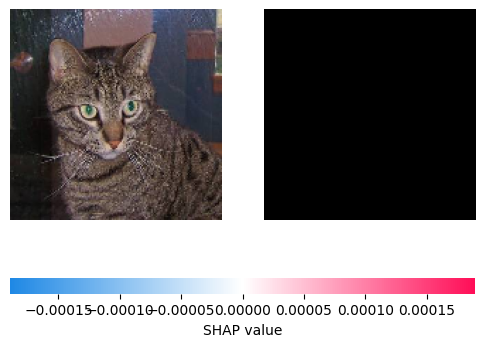

In [26]:
import shap
exp=shap.GradientExplainer(model,np.zeros((1,150,150,3)))
shap_val=exp.shap_values(img_preprocessed)
shap.image_plot(shap_val,img_preprocessed)

In [1]:
import pandas as pd
df=pd.read_csv('Dataset/breast_cancer.csv')

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df=df.drop(['id','Unnamed: 32'],axis=1)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [15]:
import xgboost
from sklearn.model_selection import train_test_split

In [16]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=xgboost.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [19]:
import shap
exp=shap.Explainer(model)
shap_val=exp(X_test)

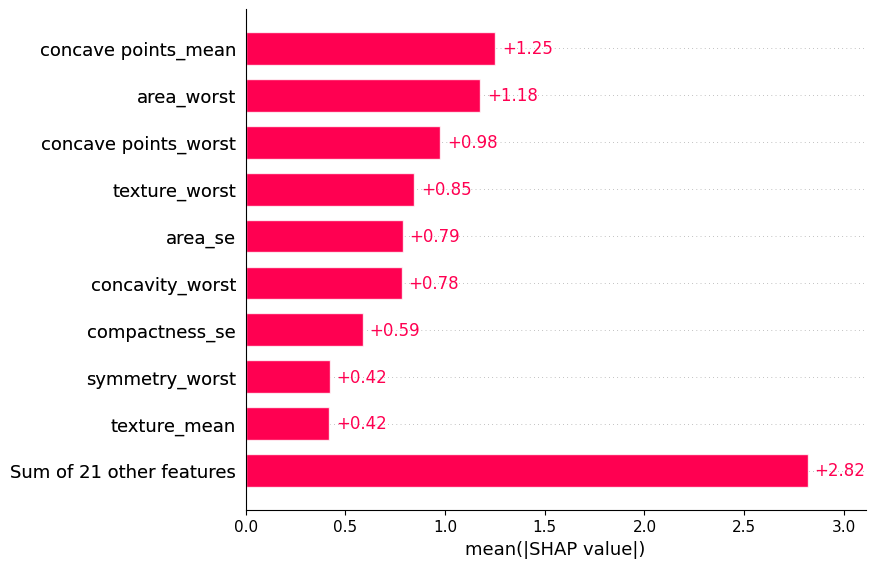

In [23]:
import matplotlib.pyplot as plt
shap.plots.bar(shap_val)

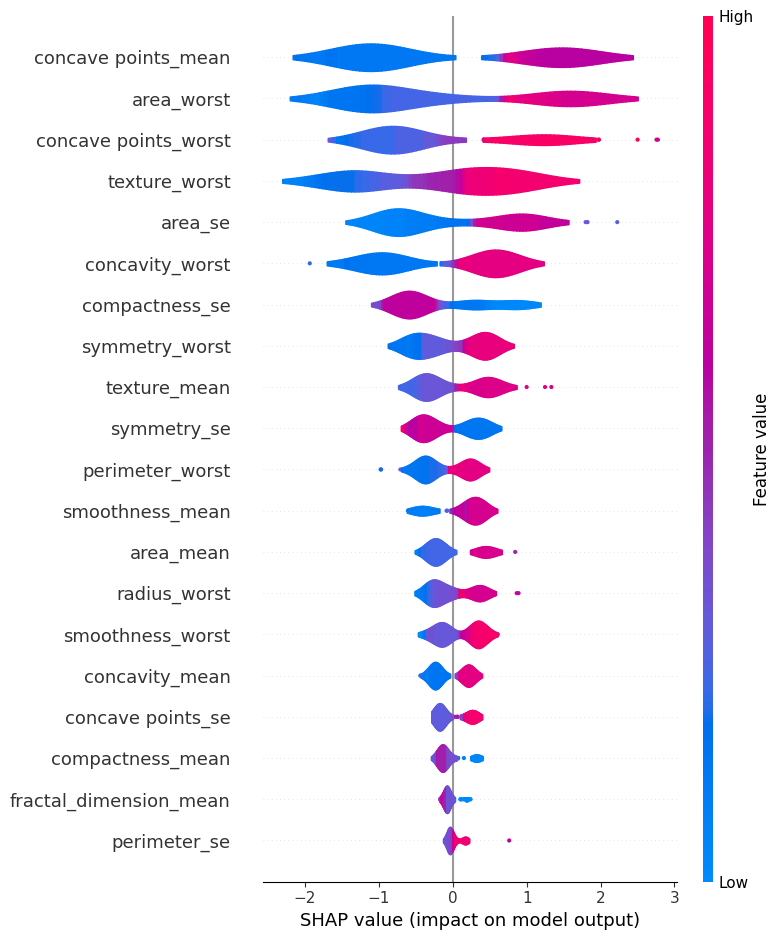

In [25]:
shap.summary_plot(shap_val,plot_type='violin')

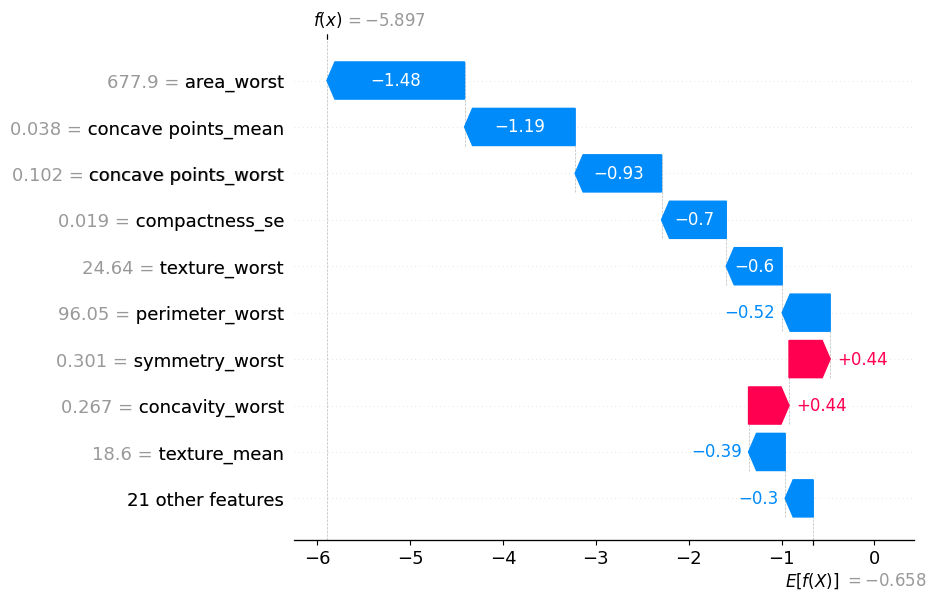

In [27]:
shap.plots.waterfall(shap_val[0])

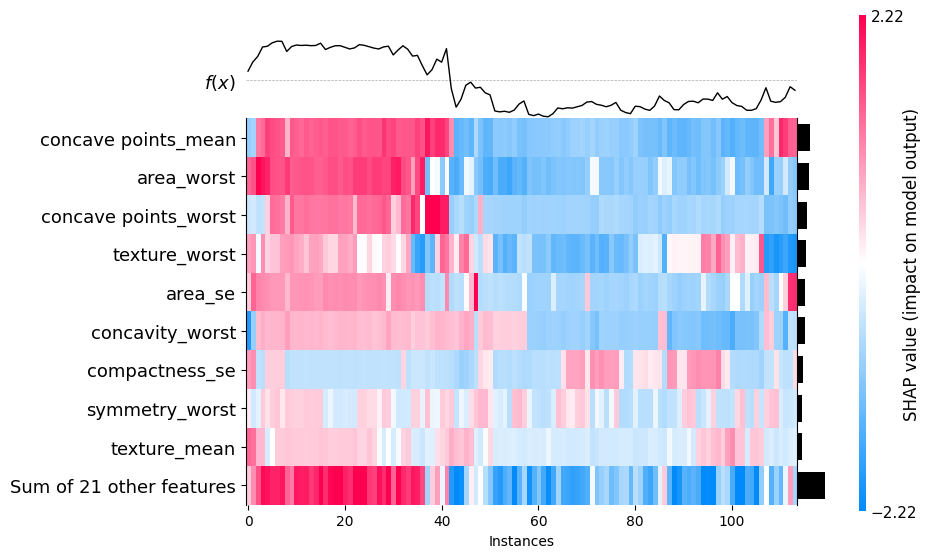

<Axes: xlabel='Instances'>

In [28]:
shap.plots.heatmap(shap_val)

In [39]:
kexp=shap.KernelExplainer(lambda x:model.predict(x),X_train)
shap_val=kexp.shap_values(X_test[:3])

Using 455 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/3 [00:00<?, ?it/s]

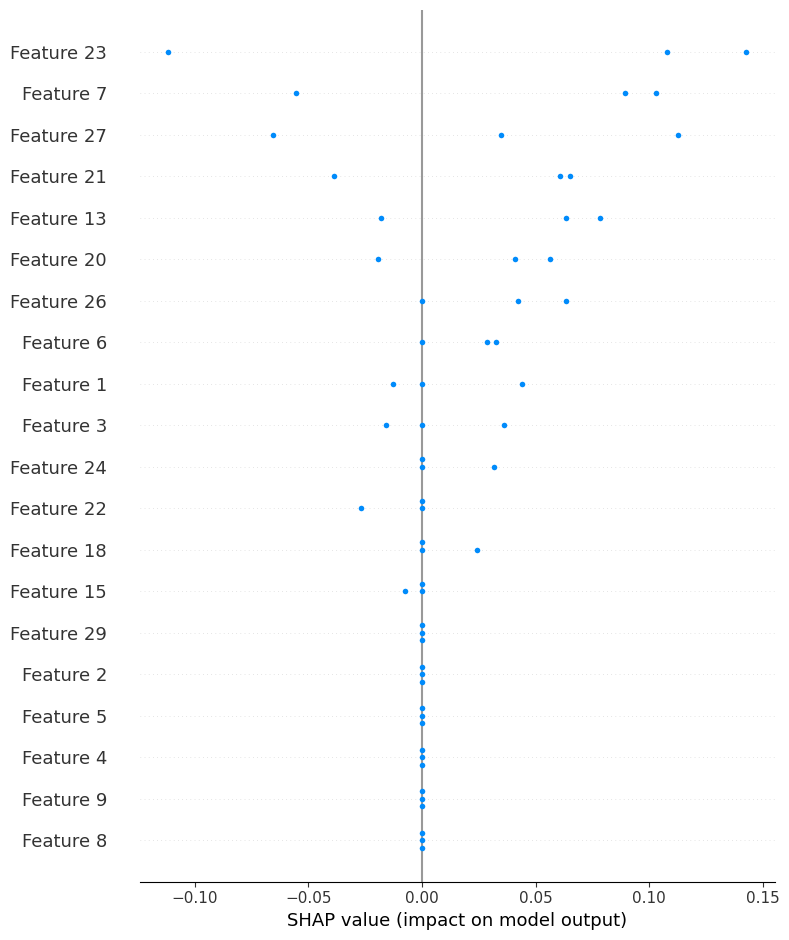

In [44]:
shap.summary_plot(shap_val)

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
datagen=ImageDataGenerator(rescale=1/255.0,validation_split=0.2)
train_data=datagen.flow_from_directory(
    'cats_dogs',
    target_size=(150,150),
    subset='training',
    class_mode='binary'
)
valid_data=datagen.flow_from_directory(
    'cats_dogs',
    target_size=(150,150),
    subset='validation',
    class_mode='binary'
)

Found 107 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [51]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_data,validation_data=valid_data,epochs=5)

E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 927ms/step - accuracy: 0.4631 - loss: 3.0270 - val_accuracy: 0.4615 - val_loss: 0.7850
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 700ms/step - accuracy: 0.5296 - loss: 0.7032 - val_accuracy: 0.4615 - val_loss: 0.7003
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 698ms/step - accuracy: 0.5095 - loss: 0.6910 - val_accuracy: 0.5385 - val_loss: 0.6930
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 609ms/step - accuracy: 0.5712 - loss: 0.6923 - val_accuracy: 0.5769 - val_loss: 0.6925
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 604ms/step - accuracy: 0.6604 - loss: 0.6907 - val_accuracy: 0.5769 - val_loss: 0.6931


In [69]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np

img_path='Dataset/CAT.jpg'
img=load_img(img_path,target_size=(150,150))
img_arr=img_to_array(img)
img_preproc=np.expand_dims(img_arr/255.0,axis=0)

In [79]:
background = np.zeros((1,150,150,3))  # More Pythonic way
exp=shap.GradientExplainer(model,background)

In [80]:
shap_val=exp.shap_values(img_preproc)

E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_24
Received: inputs=['Tensor(shape=(1, 150, 150, 3))']
  warnings.warn(msg)
E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_24
Received: inputs=['Tensor(shape=(50, 150, 150, 3))']
  warnings.warn(msg)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0002819678629748523..0.00034629926085472107].


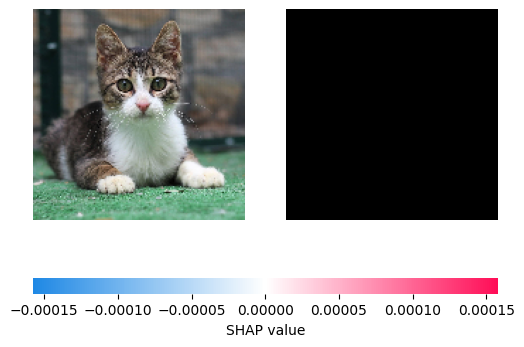

In [81]:
shap.image_plot(shap_val,img_preproc)

In [82]:
pred = model.predict(img_preproc)
print(f"Model prediction: {pred[0][0]}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Model prediction: 0.6036827564239502


In [83]:
shap_val = exp.shap_values(img_preproc)
print("SHAP min/max:", np.min(shap_val), np.max(shap_val))  # Should not be all zeros

SHAP min/max: -0.0002830582670867443 0.0003467878559604287
